In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [68]:
df=pd.read_csv('Fraud_check.csv')
df.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [70]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [71]:
df.shape

(600, 6)

In [72]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [73]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [74]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [75]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

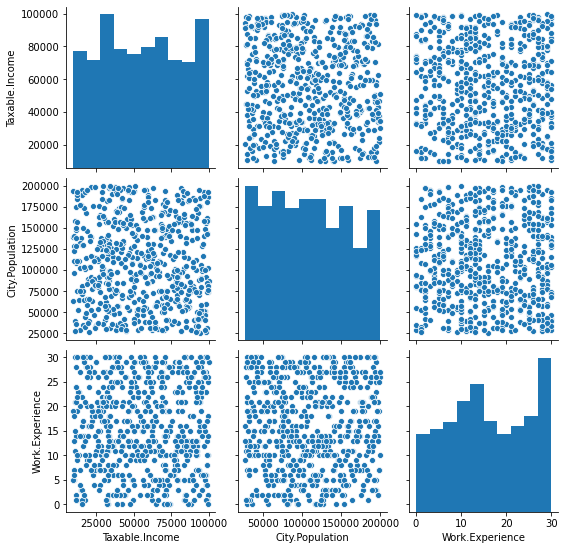

In [76]:
import seaborn as sns
sns.pairplot(df)

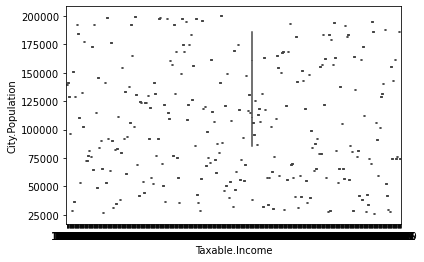

In [77]:
sns.boxplot(df['Taxable.Income'],df['City.Population'])

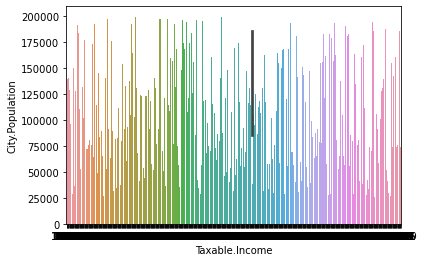

In [78]:
sns.barplot(df['Taxable.Income'],df['City.Population'])

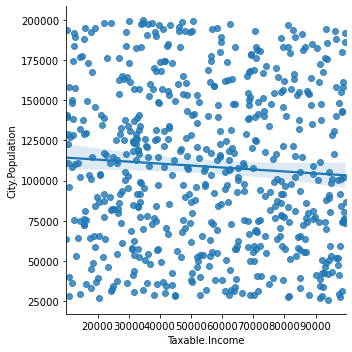

In [79]:
sns.lmplot(x='Taxable.Income',y='City.Population', data=df)

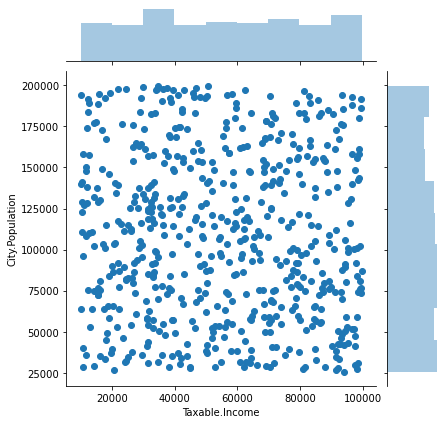

In [80]:
sns.jointplot(df['Taxable.Income'],df['City.Population'])

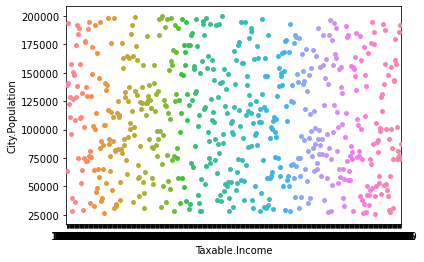

In [81]:
sns.stripplot(df['Taxable.Income'],df['City.Population'])

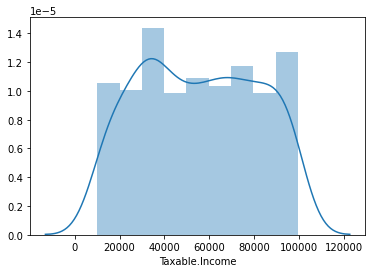

In [82]:
sns.distplot(df['Taxable.Income'])

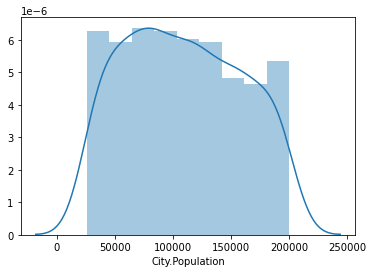

In [83]:
sns.distplot(df['City.Population'])

In [84]:
#preprocessing
df.loc[df["Taxable.Income"] <= 30000,"Taxable_Income1"]="Good"
df.loc[df["Taxable.Income"] >= 30001,"Taxable_Income1"]="Risky"

In [85]:
df.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income1
0,NO,Single,68833,50047,10,YES,Risky
1,YES,Divorced,33700,134075,18,YES,Risky
2,NO,Married,36925,160205,30,YES,Risky
3,YES,Single,50190,193264,15,YES,Risky
4,NO,Married,81002,27533,28,NO,Risky
5,NO,Divorced,33329,116382,0,NO,Risky
6,NO,Divorced,83357,80890,8,YES,Risky
7,YES,Single,62774,131253,3,YES,Risky
8,NO,Single,83519,102481,12,YES,Risky
9,YES,Divorced,98152,155482,4,YES,Risky


In [90]:
#label encoding
label_encoder = preprocessing.LabelEncoder()
df["Undergrad"] = label_encoder.fit_transform(df["Undergrad"])
df["Marital.Status"] = label_encoder.fit_transform(df["Marital.Status"])
df["Urban"] = label_encoder.fit_transform(df["Urban"])
df["Taxable_Income1"] = label_encoder.fit_transform(df["Taxable_Income1"])

In [92]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income1
0,0,2,387,50047,10,1,1
1,1,0,163,134075,18,1,1
2,0,1,186,160205,30,1,1
3,1,2,272,193264,15,1,1
4,0,1,468,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,436,39492,7,1,1
596,1,0,395,55369,2,1,1
597,0,0,251,154058,0,1,1
598,1,1,587,180083,17,0,1


In [93]:
df["Taxable_Income1"].unique()

array([1, 0])

In [95]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income1
0,0,2,387,50047,10,1,1
1,1,0,163,134075,18,1,1
2,0,1,186,160205,30,1,1
3,1,2,272,193264,15,1,1
4,0,1,468,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,436,39492,7,1,1
596,1,0,395,55369,2,1,1
597,0,0,251,154058,0,1,1
598,1,1,587,180083,17,0,1


In [100]:
x=df.iloc[:,1:7]
x

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income1
0,2,387,50047,10,1,1
1,0,163,134075,18,1,1
2,1,186,160205,30,1,1
3,2,272,193264,15,1,1
4,1,468,27533,28,0,1
...,...,...,...,...,...,...
595,0,436,39492,7,1,1
596,0,395,55369,2,1,1
597,0,251,154058,0,1,1
598,1,587,180083,17,0,1


In [102]:
y=df["Taxable_Income1"]
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable_Income1, Length: 600, dtype: int32

In [104]:
len(y)

600

In [105]:
colnames=list(df.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Taxable_Income1']

In [106]:
#split into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [107]:
model=DecisionTreeClassifier(criterion="gini")

In [109]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(167.4, 163.07999999999998, 'X[5] <= 0.5\ngini = 0.335\nsamples = 480\nvalue = [102, 378]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 102\nvalue = [102, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 378\nvalue = [0, 378]')]

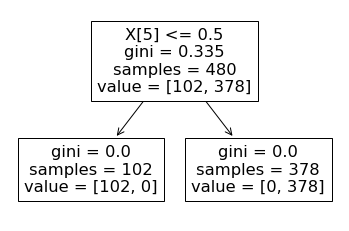

In [111]:
#build tree model
tree.plot_tree(model)

IndexError: list index out of range

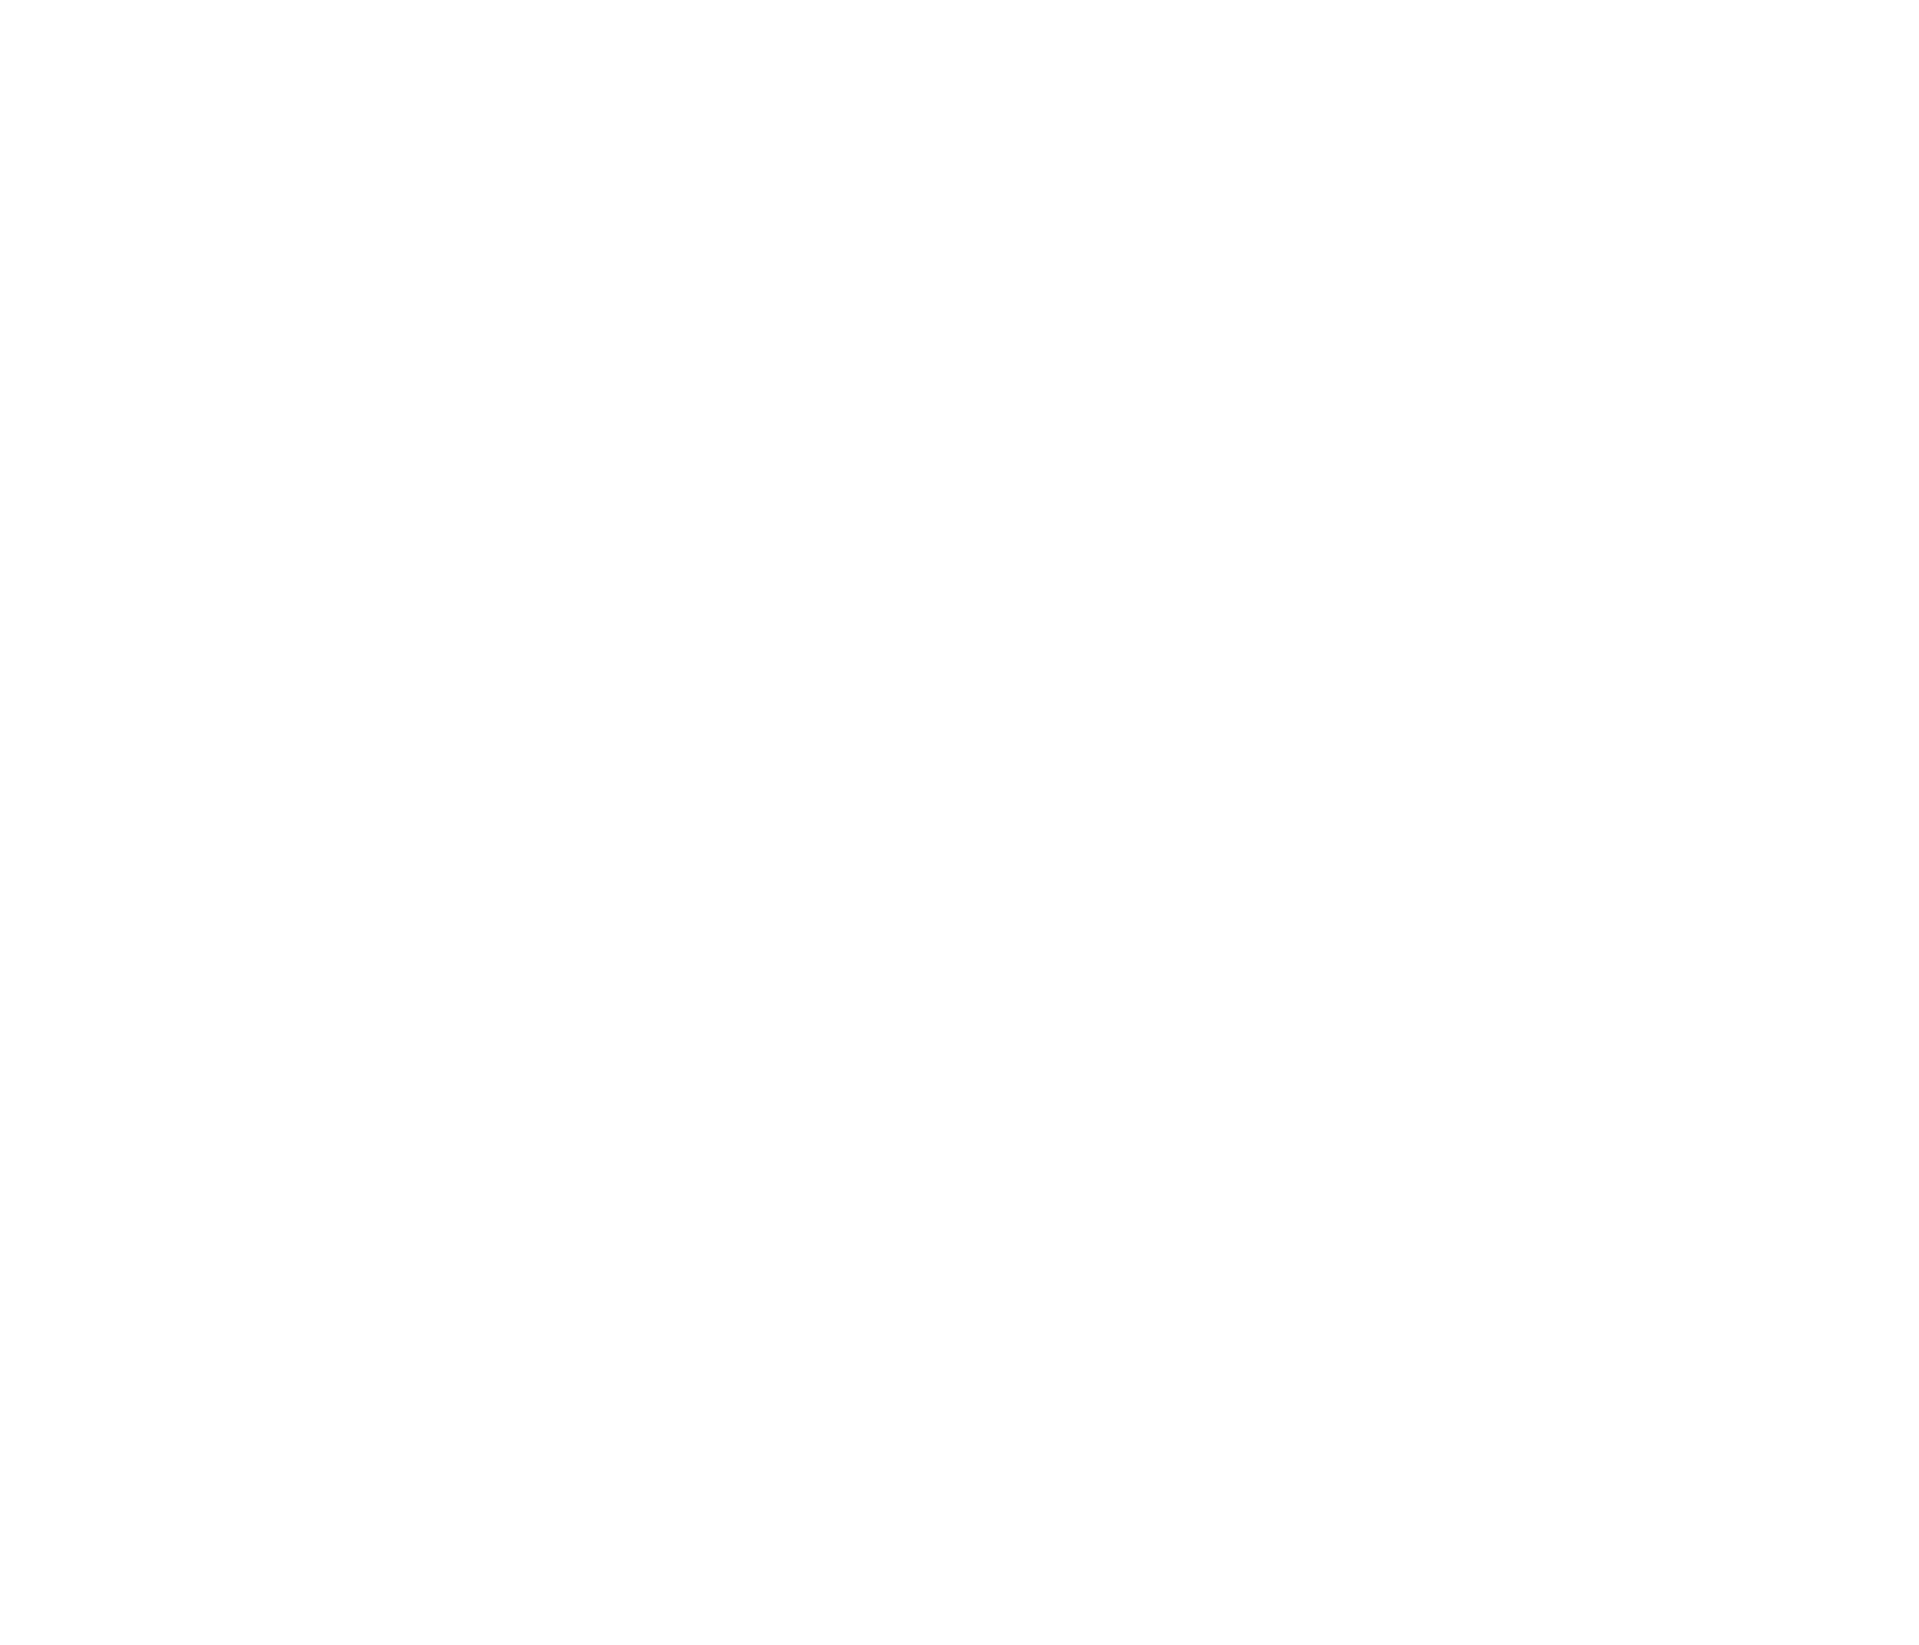

In [125]:
fn=[ 'Undergrad','Marital.Status','Taxable.Income','Work.Experience','Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,7), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [126]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    98
0    22
dtype: int64

In [128]:
pd.Series(y_test).value_counts()

1    98
0    22
Name: Taxable_Income1, dtype: int64

In [130]:
pd.crosstab(y_test,preds)

col_0,0,1
Taxable_Income1,,
0,22,0
1,0,98


In [132]:

np.mean(preds==y_test)

1.0

In [135]:
array=df.values
array

array([[  0,   2, 387, ...,  10,   1,   1],
       [  1,   0, 163, ...,  18,   1,   1],
       [  0,   1, 186, ...,  30,   1,   1],
       ...,
       [  0,   0, 251, ...,   0,   1,   1],
       [  1,   1, 587, ...,  17,   0,   1],
       [  0,   0, 569, ...,  16,   0,   1]], dtype=int64)

In [136]:
X=array[:,0:4]
X

array([[     0,      2,    387,  50047],
       [     1,      0,    163, 134075],
       [     0,      1,    186, 160205],
       ...,
       [     0,      0,    251, 154058],
       [     1,      1,    587, 180083],
       [     0,      0,    569, 158137]], dtype=int64)

In [137]:
Y=array[:,4]
Y

array([10, 18, 30, 15, 28,  0,  8,  3, 12,  4, 19,  6, 14, 16, 13, 29, 29,
       25,  6, 30, 26,  7, 14, 12, 30, 27, 15, 12,  5, 30,  0, 21, 23, 21,
        1, 30,  5,  5,  3, 16, 26,  1, 12, 10, 22, 14, 27,  2, 12, 15,  3,
       30, 23,  7, 23, 16, 25, 13, 15, 11, 23,  8, 13,  9, 15, 29, 12, 24,
        5, 29,  3, 22, 27,  2, 17, 19, 11, 26,  0,  7, 26, 24, 26, 18,  4,
       12, 29, 23, 24, 20, 29, 10, 13,  3,  6, 28, 17, 19, 18, 12, 25, 20,
       23,  5, 14, 15, 20,  6, 10,  8, 19, 11, 26,  7,  7, 21, 12, 29, 10,
       30, 11, 16, 26, 26, 13, 11,  3, 28, 27, 26,  7, 16, 12, 14, 28, 19,
        9,  6, 25, 20,  4, 23, 26, 11, 29,  2, 28, 28, 21, 25, 28, 10, 16,
       28, 29,  7,  3,  5, 11,  1,  0, 30, 21, 15, 28, 23, 22, 25, 30,  6,
       10, 24, 23, 16,  8, 13, 28, 13, 15, 22, 19, 20,  4, 30, 15,  0, 19,
        5, 10, 11, 19,  7, 10, 25, 28, 13, 21,  4, 28,  9, 17, 27,  0,  4,
       14, 20, 16, 28,  3, 25, 13,  8, 14, 13, 16, 22, 22, 19, 19,  9, 30,
       14, 27, 17, 25,  0